In [2]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 3.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=812c958506d2aae215ec8d33fb8e702bcdb7276556e1ad48ea50fb795f1f3b65
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [3]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [4]:
!wget https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv

--2021-04-24 05:36:39--  https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv
Resolving vincentarelbundock.github.io (vincentarelbundock.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to vincentarelbundock.github.io (vincentarelbundock.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182884 (179K) [text/csv]
Saving to: ‘bfi.csv’

bfi.csv             100%[===================>] 178.60K  --.-KB/s    in 0.02s   

2021-04-24 05:36:39 (11.1 MB/s) - ‘bfi.csv’ saved [182884/182884]



In [46]:
df= pd.read_csv("bfi.csv",index_col=[0])

In [47]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [48]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [49]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


##Adequacy Test

###Bartlett’s Test

In [54]:
#Критерий Бартлетта (англ. Bartlett's test) — статистический критерий, позволяющий проверять равенство дисперсий нескольких (двух и более) выборок. 
#Нулевая гипотеза предполагает, что рассматриваемые выборки получены из генеральных совокупностей, обладающих одинаковыми дисперсиями.
#Если тест оказался статистически незначимым, не следует использовать факторный анализ. 

In [55]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869243, 0.0)

###Kaiser-Meyer-Olkin (KMO) Test

In [56]:
#Тест Кайзера-Мейера-Олкина (КМО) измеряет пригодность данных для факторного анализа. 
#Он определяет адекватность для каждой наблюдаемой переменной и для всей модели. 
#KMO оценивает долю дисперсии среди всех наблюдаемых переменных.
#Критерий может принимать значения от нуля до единицы.
#Кайзер, Мейер и Олкин считают, что значение ниже 0,5 на этой главной диагонали недопустимо. 

In [57]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [58]:
kmo_model

0.8485397221949221

###Choosing the Number of Factors

In [59]:
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

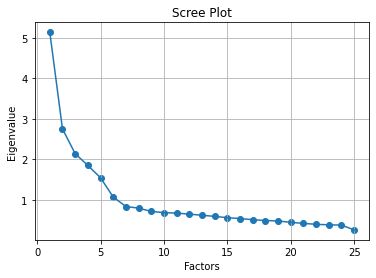

In [60]:
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

###Performing Factor Analysis

In [66]:
fa = FactorAnalyzer(rotation='varimax')
fa.set_params(n_factors=6)
fa.fit(df)
fa.loadings_


array([[ 9.52197426e-02,  4.07831575e-02,  4.87338851e-02,
        -5.30987351e-01, -1.13057329e-01,  1.61216352e-01],
       [ 3.31312765e-02,  2.35538040e-01,  1.33714395e-01,
         6.61140979e-01,  6.37337870e-02, -6.24353645e-03],
       [-9.62088444e-03,  3.43008175e-01,  1.21353368e-01,
         6.05932691e-01,  3.39902655e-02,  1.60106429e-01],
       [-8.15175587e-02,  2.19716721e-01,  2.35139532e-01,
         4.04594039e-01, -1.25338020e-01,  8.63557051e-02],
       [-1.49615885e-01,  4.14457675e-01,  1.06382165e-01,
         4.69698289e-01,  3.09765729e-02,  2.36519344e-01],
       [-4.35840205e-03,  7.72477523e-02,  5.54582256e-01,
         7.51069506e-03,  1.90123730e-01,  9.50350463e-02],
       [ 6.83300837e-02,  3.83703844e-02,  6.74545450e-01,
         5.70549868e-02,  8.75925919e-02,  1.52775079e-01],
       [-3.99936733e-02,  3.18673007e-02,  5.51164439e-01,
         1.01282240e-01, -1.13380871e-02,  8.99628359e-03],
       [ 2.16283366e-01, -6.62407735e-02, -6.384

In [68]:
fa = FactorAnalyzer(rotation='varimax')
fa.set_params(n_factors=5)
fa.fit(df)
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.65074261,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.08786921,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582378,  0.03887794,  0.20958365],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.06498371, -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481258, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087733],
       [-0.11561383,  0.64683266,  0.1

In [69]:
fa.get_factor_variance()

(array([2.70963262, 2.47308982, 2.04110563, 1.84449799, 1.52215296]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))